In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv', delimiter=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [3]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


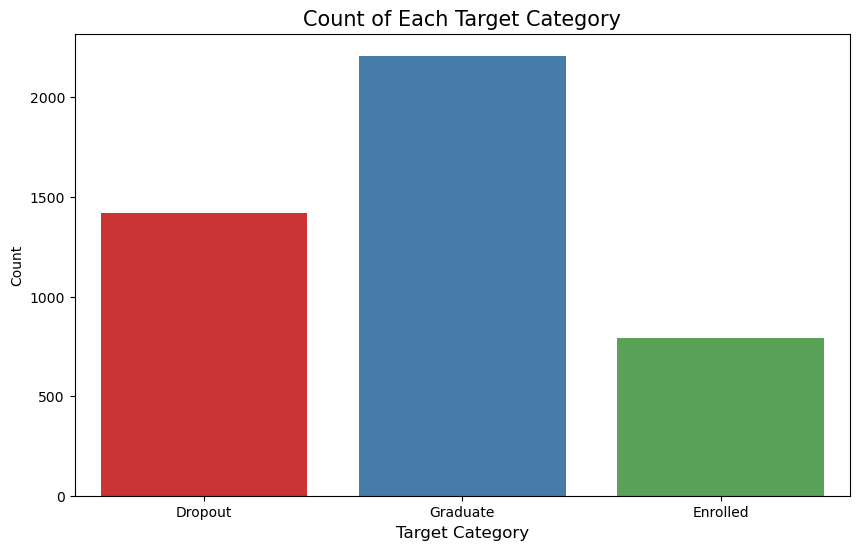

In [4]:
#幫我把targer三個類型的資料個數印出來
plt.figure(figsize=(10, 6))
sns.countplot(x='Target', data=df, palette='Set1')
plt.title('Count of Each Target Category', fontsize=15)
plt.xlabel('Target Category', fontsize=12)
plt.ylabel('Count')
plt.show()

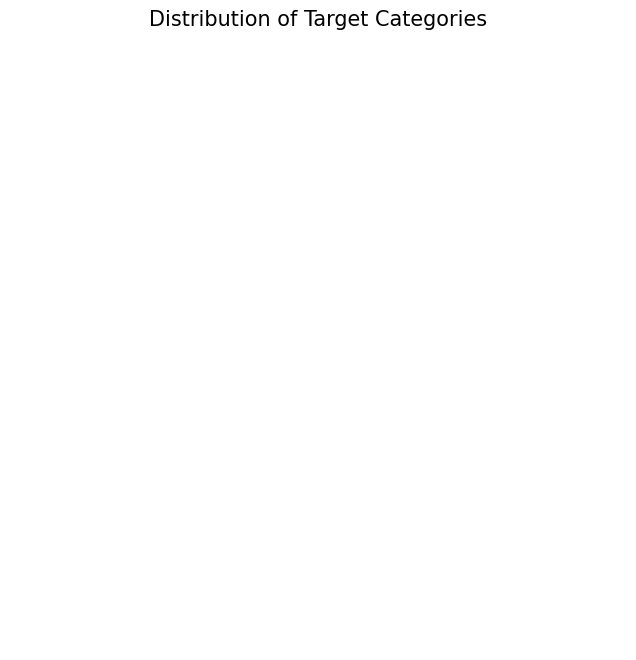

In [16]:
target_mapping = {0: 'Dropout', 1: 'Graduate', 2: 'Enrolled'}
df['Target'] = df['Target'].map(target_mapping)

# 计算每个类别的计数
target_counts = df['Target'].value_counts()
colors = sns.color_palette('Set1', n_colors=3)
# 绘制饼图
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Target Categories', fontsize=15)
plt.show()

In [6]:
column_names = df.columns.tolist()
df.rename(columns={'Nacionality':'Nationality','Daytime/evening attendance\t':'Daytime/evening attendance'}, inplace=True)

In [7]:
df_Demographic = df[['Marital status','Nationality','Displaced','Gender','Age at enrollment','International']]
df_Demographic

,Marital status,Nationality,Displaced,Gender,Age at enrollment,International
0,1,1,1,1,20,0
1,1,1,1,1,19,0
2,1,1,1,1,19,0
3,1,1,1,0,20,0
4,2,1,0,0,45,0
...,...,...,...,...,...,...
4419,1,1,0,1,19,0
4420,1,105,1,0,18,1
4421,1,1,1,0,30,0
4422,1,1,1,0,20,0


In [8]:
df_SocioEconomic = df[['Father\'s qualification', 'Mother\'s qualification', 'Father\'s occupation', 
                       'Mother\'s occupation', 'Educational special needs', 'Debtor', 
                       'Tuition fees up to date', 'Scholarship holder']]
df_SocioEconomic

,Father's qualification,Mother's qualification,Father's occupation,Mother's occupation,Educational special needs,Debtor,Tuition fees up to date,Scholarship holder
0,12,19,9,5,0,0,1,0
1,3,1,3,3,0,0,0,0
2,37,37,9,9,0,0,0,0
3,37,38,3,5,0,0,1,0
4,38,37,9,9,0,0,1,0
...,...,...,...,...,...,...,...,...
4419,1,1,4,5,0,0,1,0
4420,1,1,9,9,0,1,0,0
4421,37,37,9,9,0,0,1,1
4422,37,37,4,7,0,0,1,1


In [9]:
df_MacroEconomic = df[['Unemployment rate', 'Inflation rate', 'GDP']]
df_MacroEconomic

,Unemployment rate,Inflation rate,GDP
0,10.8,1.4,1.74
1,13.9,-0.3,0.79
2,10.8,1.4,1.74
3,9.4,-0.8,-3.12
4,13.9,-0.3,0.79
...,...,...,...
4419,15.5,2.8,-4.06
4420,11.1,0.6,2.02
4421,13.9,-0.3,0.79
4422,9.4,-0.8,-3.12


In [10]:
df_Academic_enrollment = df[['Application mode', 'Application order', 'Course', 'Daytime/evening attendance']]
df_Academic_enrollment

,Application mode,Application order,Course,Daytime/evening attendance
0,17,5,171,1
1,15,1,9254,1
2,1,5,9070,1
3,17,2,9773,1
4,39,1,8014,0
...,...,...,...,...
4419,1,6,9773,1
4420,1,2,9773,1
4421,1,1,9500,1
4422,1,1,9147,1


In [11]:
df_Academic_1 = df[['Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)']]
df_Academic_1

,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations)
0,0,0,0,0,0.000000,0
1,0,6,6,6,14.000000,0
2,0,6,0,0,0.000000,0
3,0,6,8,6,13.428571,0
4,0,6,9,5,12.333333,0
...,...,...,...,...,...,...
4419,0,6,7,5,13.600000,0
4420,0,6,6,6,12.000000,0
4421,0,7,8,7,14.912500,0
4422,0,5,5,5,13.800000,0


In [12]:
df_Academic_2 = df[['Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)','Curricular units 2nd sem (without evaluations)']]
df_Academic_2

,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations)
0,0,0,0,0,0.000000,0
1,0,6,6,6,13.666667,0
2,0,6,0,0,0.000000,0
3,0,6,10,5,12.400000,0
4,0,6,6,6,13.000000,0
...,...,...,...,...,...,...
4419,0,6,8,5,12.666667,0
4420,0,6,6,2,11.000000,0
4421,0,8,9,1,13.500000,0
4422,0,5,6,5,12.000000,0


In [13]:
categorical_columns = df.select_dtypes(include=['category', 'object']).columns.tolist()

for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Column: {column}")
    print(f"Unique values: {unique_values}\n")

Column: Target
Unique values: [nan]



In [14]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
for column in numeric_columns:
    min_value = df[column].min()
    max_value = df[column].max()
    print(f"Column: {column}")
    print(f"Range: {min_value} - {max_value}\n")


Column: Marital status
Range: 1 - 6

Column: Application mode
Range: 1 - 57

Column: Application order
Range: 0 - 9

Column: Course
Range: 33 - 9991

Column: Daytime/evening attendance
Range: 0 - 1

Column: Previous qualification
Range: 1 - 43

Column: Previous qualification (grade)
Range: 95.0 - 190.0

Column: Nationality
Range: 1 - 109

Column: Mother's qualification
Range: 1 - 44

Column: Father's qualification
Range: 1 - 44

Column: Mother's occupation
Range: 0 - 194

Column: Father's occupation
Range: 0 - 195

Column: Admission grade
Range: 95.0 - 190.0

Column: Displaced
Range: 0 - 1

Column: Educational special needs
Range: 0 - 1

Column: Debtor
Range: 0 - 1

Column: Tuition fees up to date
Range: 0 - 1

Column: Gender
Range: 0 - 1

Column: Scholarship holder
Range: 0 - 1

Column: Age at enrollment
Range: 17 - 70

Column: International
Range: 0 - 1

Column: Curricular units 1st sem (credited)
Range: 0 - 20

Column: Curricular units 1st sem (enrolled)
Range: 0 - 26

Column: Curri

In [15]:
discrete_columns = ['Marital status', 'Nationality','Course']
plt.figure(figsize=(15, 10))

for i, col in enumerate(discrete_columns, 1):
    sns.countplot(x=col, hue='Target', data=df, palette='Set1')
    plt.title(f'{col.replace("_", " ")} vs Target', fontsize=20)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

ValueError: min() arg is an empty sequence

<Figure size 1500x1000 with 0 Axes>

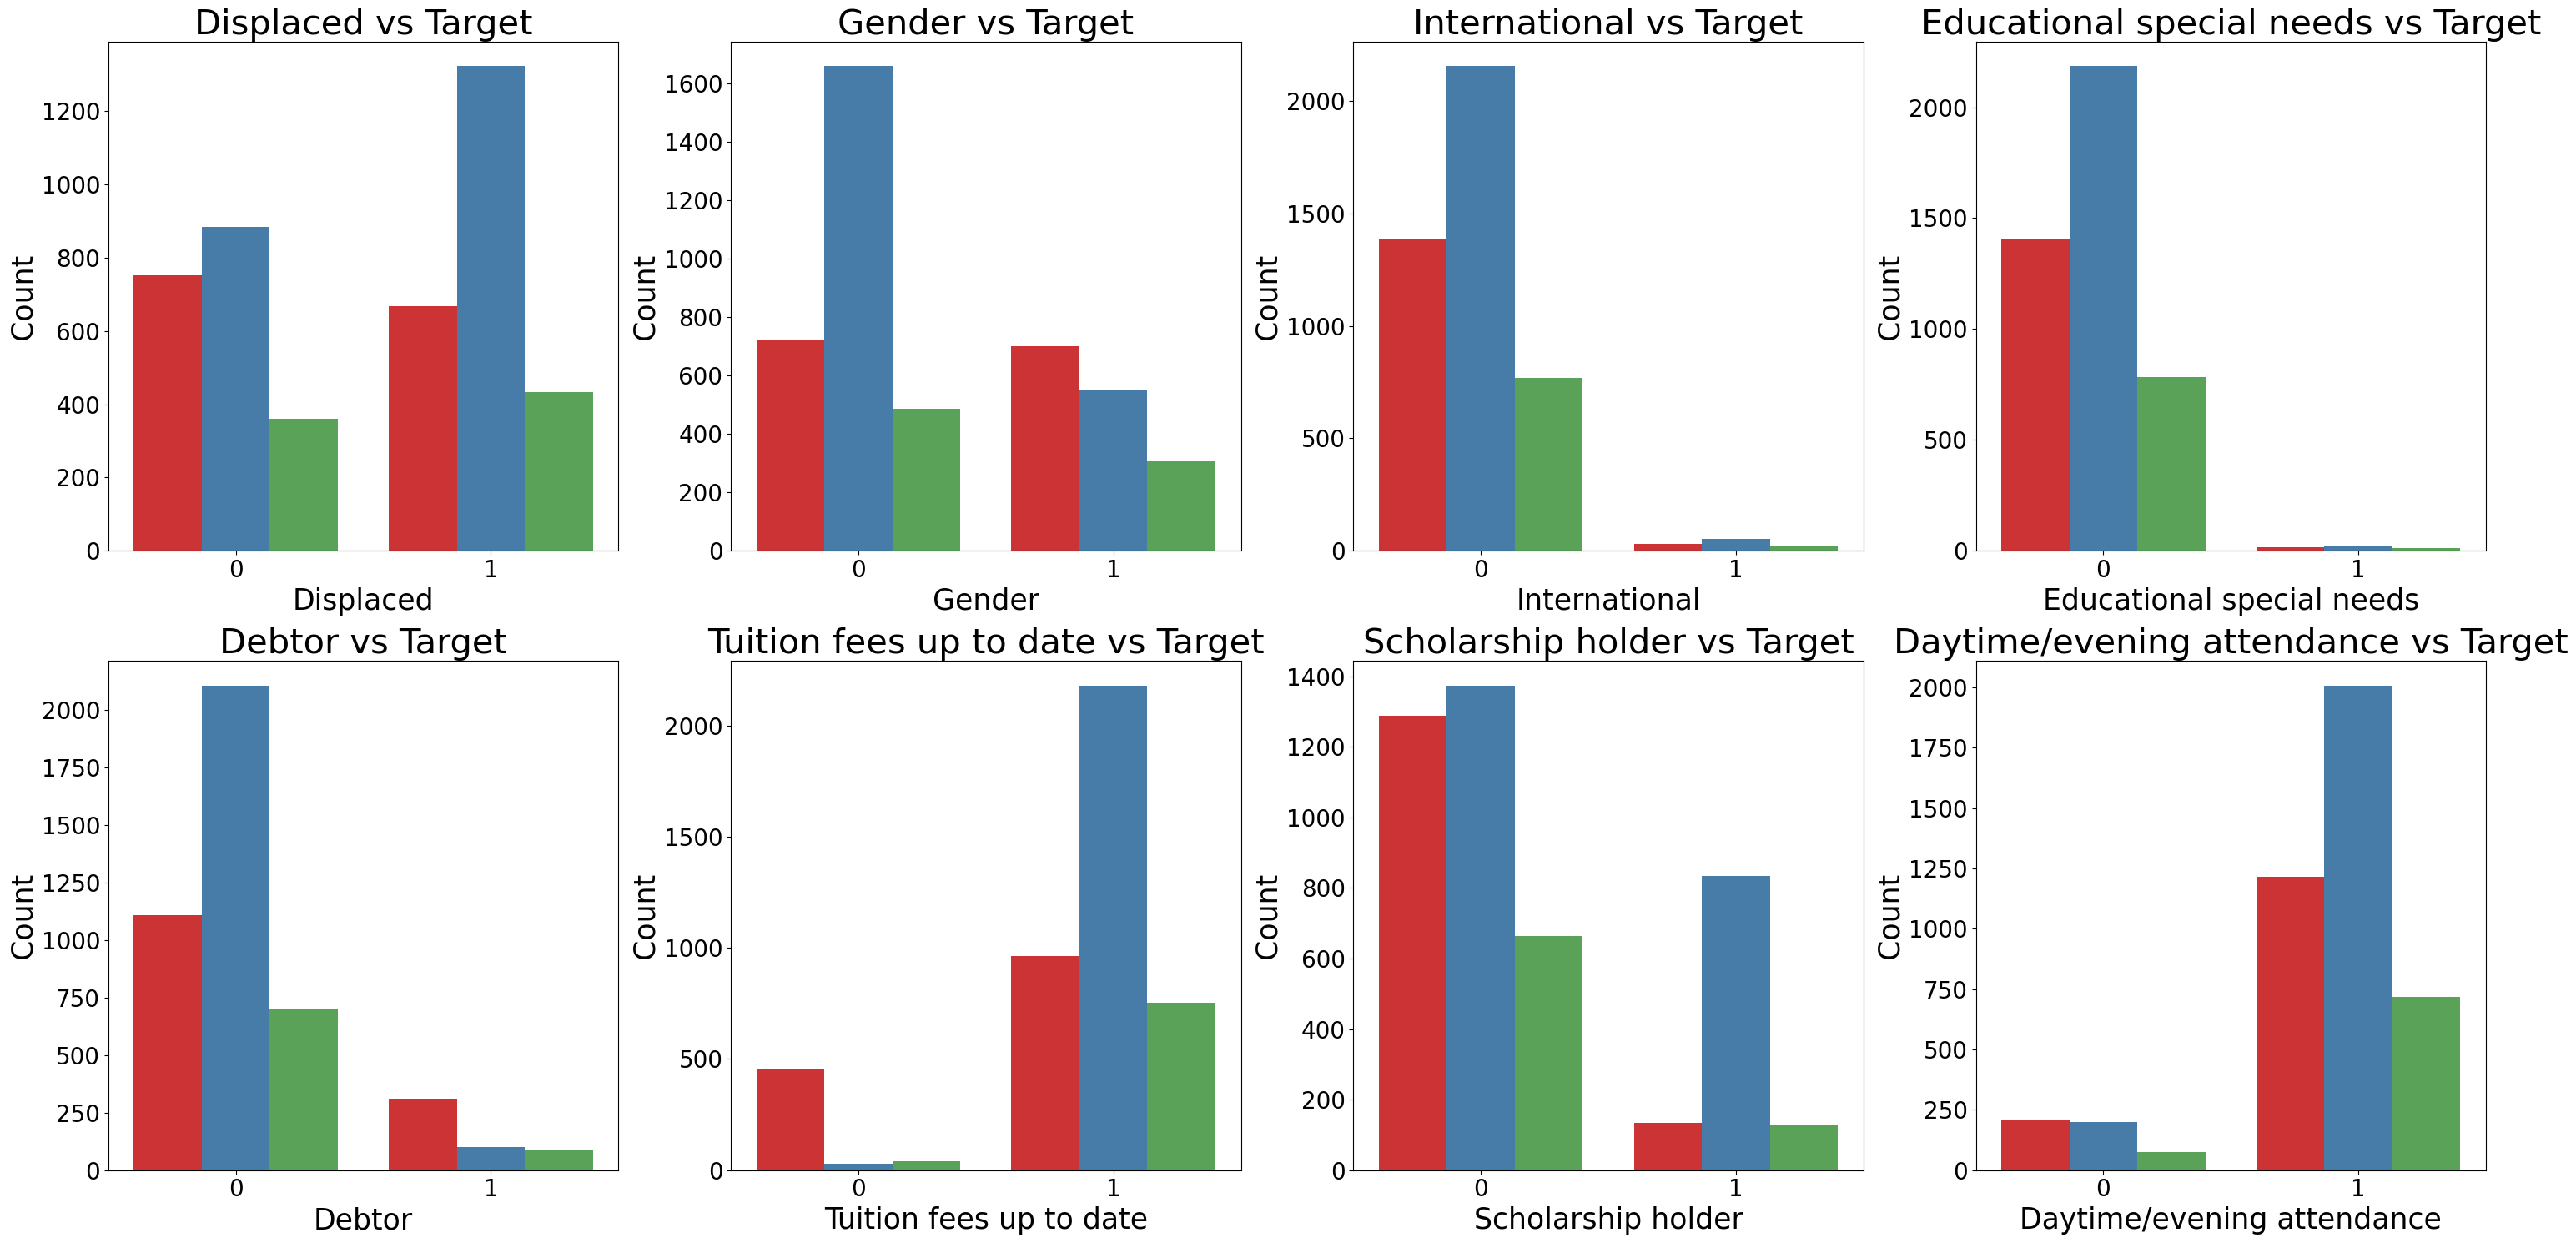

In [ ]:
binary_columns = [
    'Displaced',
    'Gender',
    'International',
    'Educational special needs',
    'Debtor',
    'Tuition fees up to date',
    'Scholarship holder',
    'Daytime/evening attendance'
]

plt.figure(figsize=(30, 15))

for i, col in enumerate(binary_columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(x=col, hue='Target', data=df, palette='Set1')
    plt.title(f'{col.replace("_", " ")} vs Target', fontsize=30)
    plt.xlabel(col.replace("_", " "), fontsize=25)
    plt.ylabel('Count', fontsize=25)
    plt.xticks(rotation=0, fontsize=20)
    plt.yticks(fontsize=20)
    plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

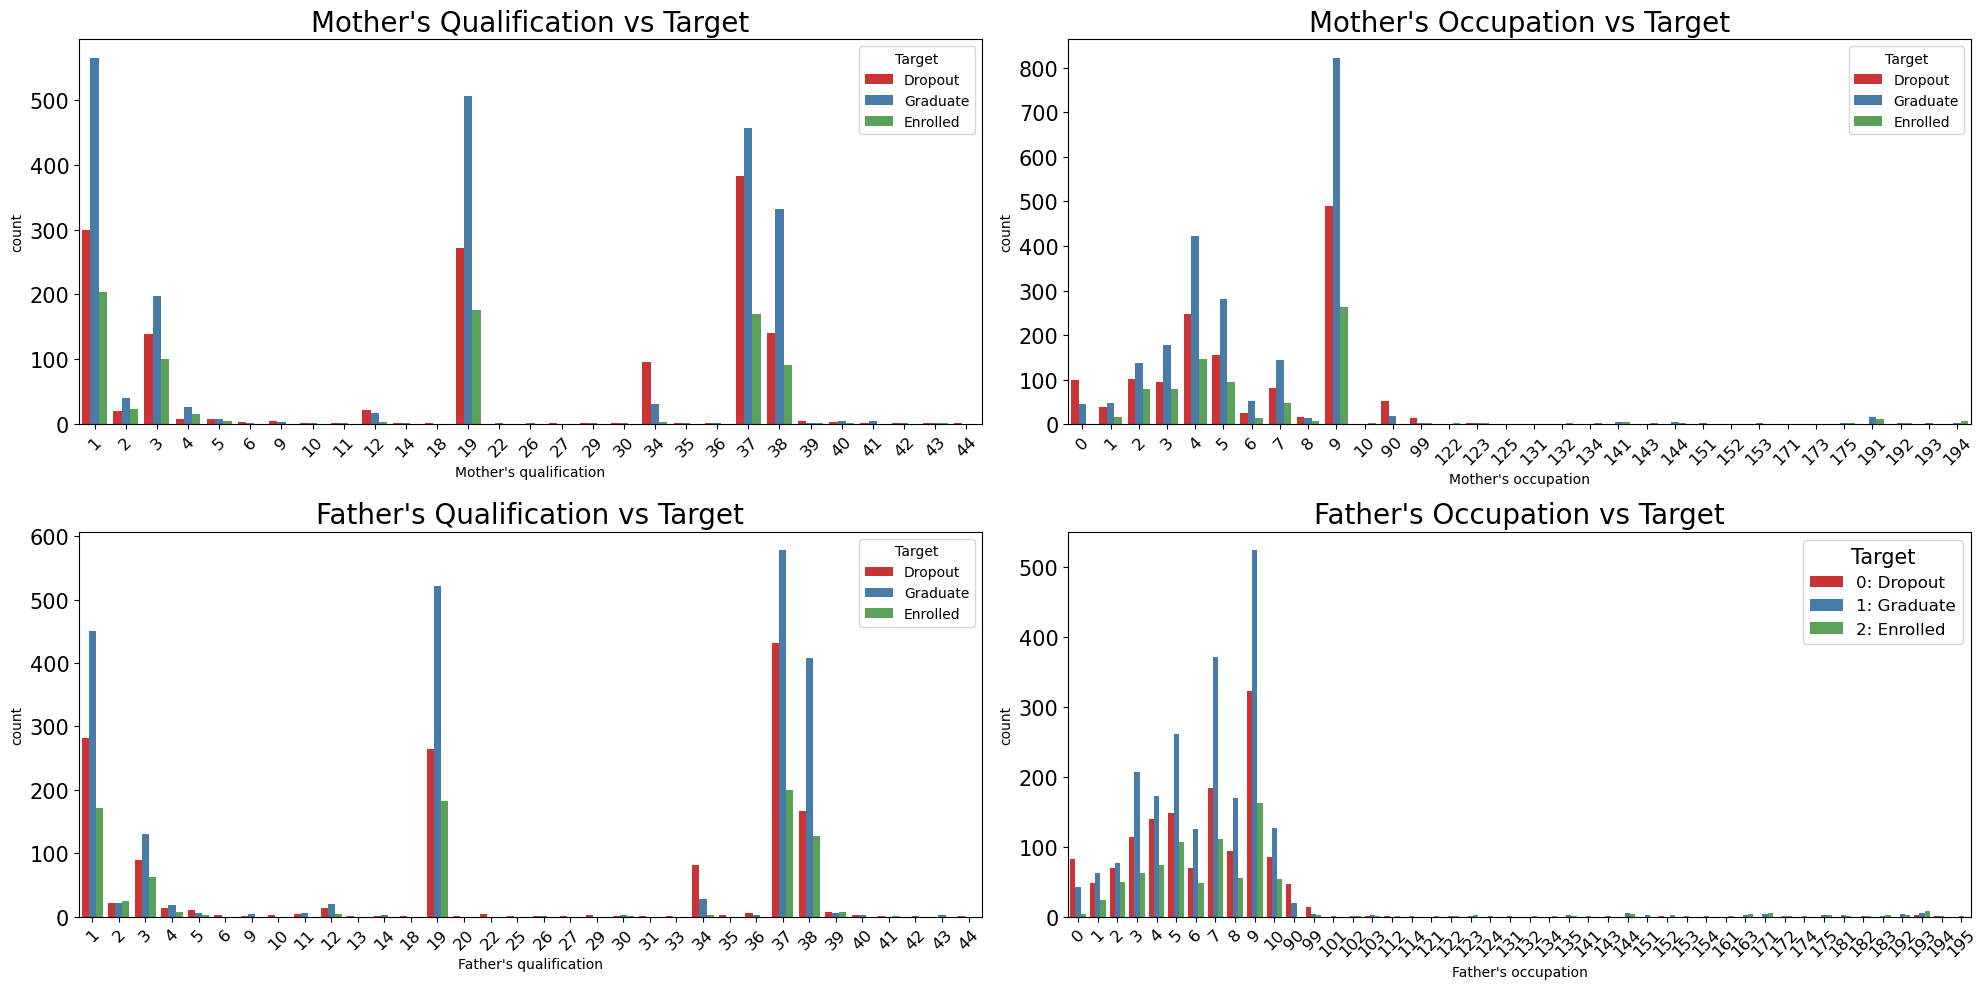

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='Mother\'s qualification', hue='Target', data=df, palette='Set1')
plt.title('Mother\'s Qualification vs Target', fontsize=20)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=15)

plt.subplot(2, 2, 3)
sns.countplot(x='Father\'s qualification', hue='Target', data=df, palette='Set1')
plt.title('Father\'s Qualification vs Target', fontsize=20)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=15)

plt.subplot(2, 2, 2)
sns.countplot(x='Mother\'s occupation', hue='Target', data=df, palette='Set1')
plt.title('Mother\'s Occupation vs Target', fontsize=20)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=15)

plt.subplot(2, 2, 4)
sns.countplot(x='Father\'s occupation', hue='Target', data=df, palette='Set1')
plt.title('Father\'s Occupation vs Target', fontsize=20)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=15)

handles, labels = plt.gca().get_legend_handles_labels()
custom_labels = ['0: Dropout', '1: Graduate', '2: Enrolled']
plt.legend(handles, custom_labels, title='Target', fontsize=12, title_fontsize=15)

plt.tight_layout()
plt.show()

### Remapping the Target

In [ ]:
df.loc[:, 'Target'] = df['Target'].map(
    {'Dropout': 0,
    'Graduate': 1,
    'Enrolled': 2})

### Data Standardization

In [ ]:
floatAttribute = ["Previous qualification (grade)", "Admission grade", "Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)",
                 "Unemployment rate", "Inflation rate", "GDP"]

In [ ]:
df[floatAttribute].describe()

,Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,132.613314,126.978119,10.640822,10.230206,11.566139,1.228029,0.001969
std,13.188332,14.482001,4.843663,5.210808,2.663850,1.382711,2.269935
min,95.000000,95.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,125.000000,117.900000,11.000000,10.750000,9.400000,0.300000,-1.700000
50%,133.100000,126.100000,12.285714,12.200000,11.100000,1.400000,0.320000
75%,140.000000,134.800000,13.400000,13.333333,13.900000,2.600000,1.790000
max,190.000000,190.000000,18.875000,18.571429,16.200000,3.700000,3.510000


In [ ]:
# Data Standardization
from sklearn.preprocessing import StandardScaler

df_Std = df.copy()

scaler = StandardScaler()
for attribute in floatAttribute:
    df_Std[attribute] = scaler.fit_transform(df_Std[[attribute]])


In [ ]:
df_Std[floatAttribute].describe()

,Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
count,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03,4.424000e+03
mean,-3.589654e-16,-9.708930e-16,1.718537e-16,-2.409164e-16,-5.460771e-17,1.445498e-16,2.569775e-17
std,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00
min,-2.852337e+00,-2.208378e+00,-2.197102e+00,-1.963489e+00,-1.489043e+00,-1.466871e+00,-1.789667e+00
25%,-5.773417e-01,-6.269262e-01,7.416267e-02,9.976438e-02,-8.132529e-01,-6.712423e-01,-7.498721e-01
50%,3.690696e-02,-6.064208e-02,3.396352e-01,3.780636e-01,-1.750068e-01,1.243865e-01,1.401217e-01
75%,5.601559e-01,5.401715e-01,5.697114e-01,5.955849e-01,8.762221e-01,9.923451e-01,7.877904e-01
max,4.351815e+00,4.352230e+00,1.700182e+00,1.600935e+00,1.739731e+00,1.787974e+00,1.545607e+00


### Data Normalization

In [ ]:
# Data Normalization
from sklearn.preprocessing import MinMaxScaler

df_Nor = df_Std.copy()


scaler = MinMaxScaler()
for attribute in floatAttribute:
    df_Nor[attribute] = scaler.fit_transform(df_Nor[[attribute]])


In [ ]:
df_Nor[floatAttribute]

,Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
0,0.284211,0.340000,0.000000,0.000000,0.372093,0.488889,0.766182
1,0.684211,0.500000,0.741722,0.735897,0.732558,0.111111,0.640687
2,0.284211,0.313684,0.000000,0.000000,0.372093,0.488889,0.766182
3,0.284211,0.258947,0.711447,0.667692,0.209302,0.000000,0.124174
4,0.052632,0.489474,0.653422,0.700000,0.732558,0.111111,0.640687
...,...,...,...,...,...,...,...
4419,0.315789,0.286316,0.720530,0.682051,0.918605,0.800000,0.000000
4420,0.263158,0.252632,0.635762,0.592308,0.406977,0.311111,0.803170
4421,0.621053,0.573684,0.790066,0.726923,0.732558,0.111111,0.640687
4422,0.894737,0.618947,0.731126,0.646154,0.209302,0.000000,0.124174


In [ ]:
df_Nor[floatAttribute].describe()

,Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,0.395930,0.336612,0.563752,0.550857,0.461179,0.450673,0.536588
std,0.138825,0.152442,0.256618,0.280582,0.309750,0.307269,0.299859
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.315789,0.241053,0.582781,0.578846,0.209302,0.244444,0.311757
50%,0.401053,0.327368,0.650899,0.656923,0.406977,0.488889,0.578600
75%,0.473684,0.418947,0.709934,0.717949,0.732558,0.755556,0.772787
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


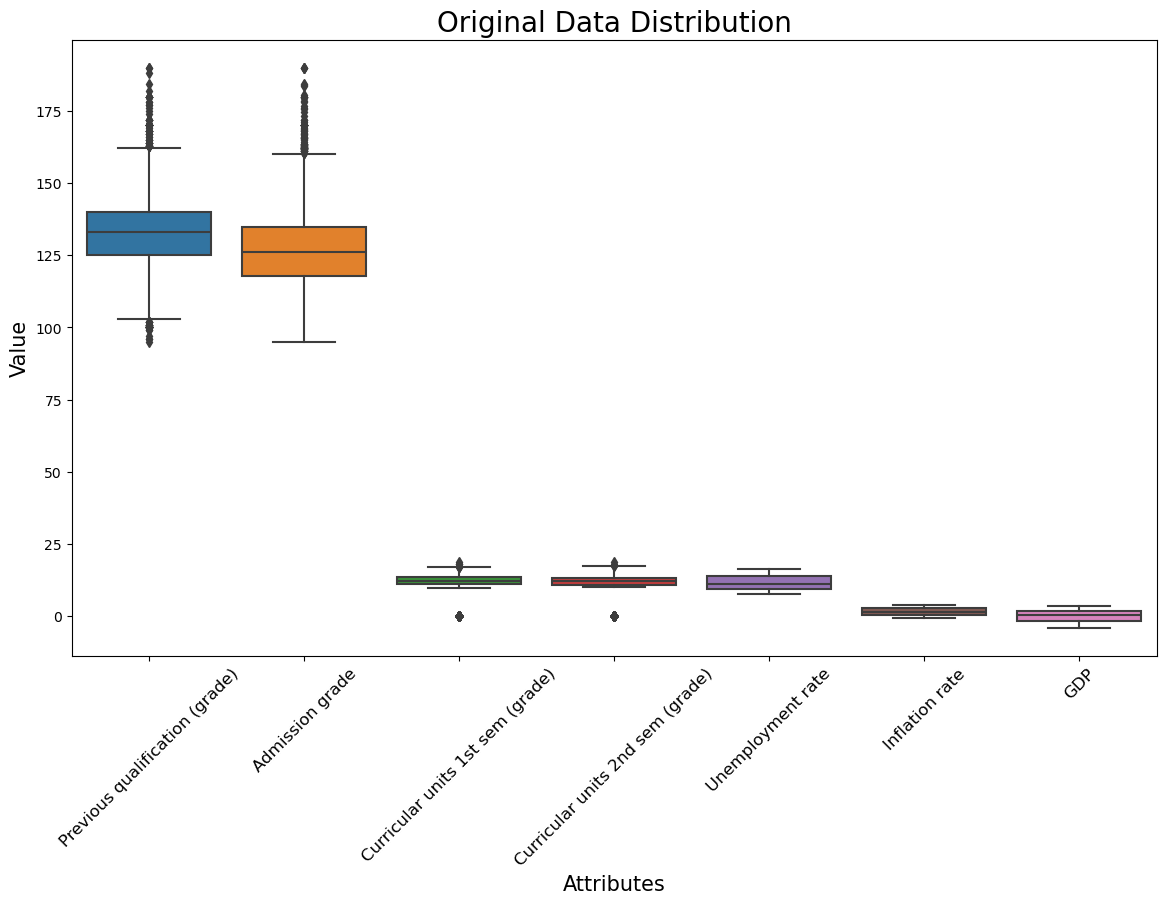

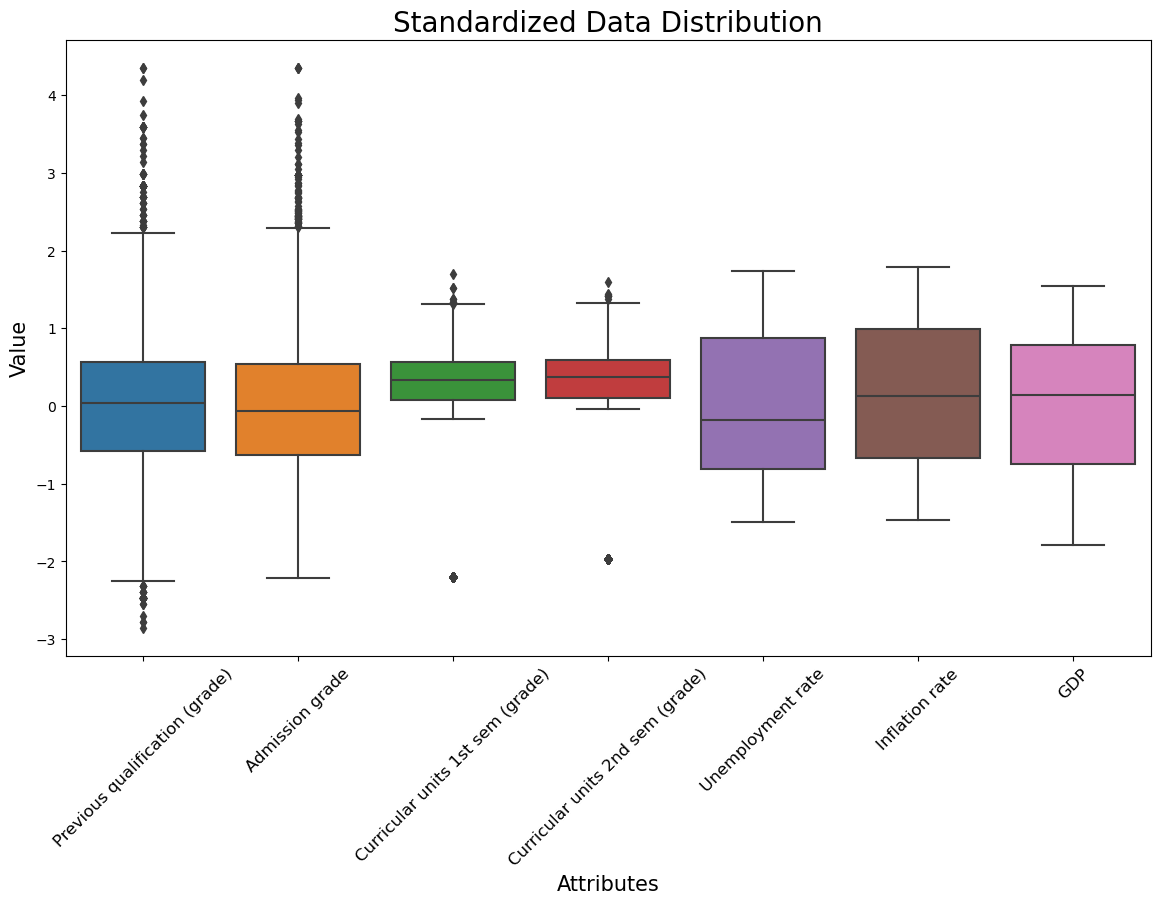

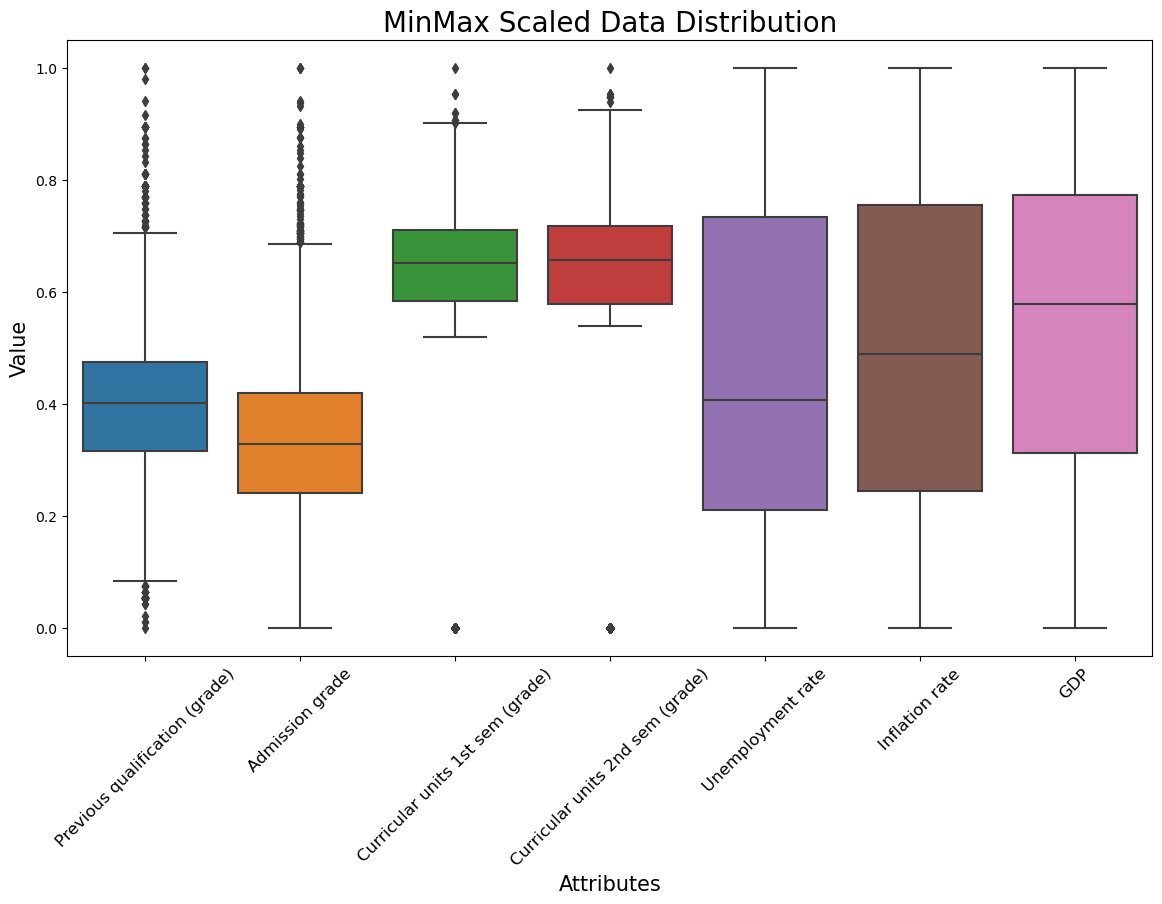

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[floatAttribute])
plt.title('Original Data Distribution', fontsize=20)
plt.xlabel('Attributes', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_Std[floatAttribute])
plt.title('Standardized Data Distribution', fontsize=20)
plt.xlabel('Attributes', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_Nor[floatAttribute])
plt.title('MinMax Scaled Data Distribution', fontsize=20)
plt.xlabel('Attributes', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.show()

### Statistical Anaylize

In [ ]:
# Used to calculate the correlation of categorical data

from scipy.stats import chi2_contingency

# H0: attribute1 and attribute2 are independent.
# H1: attribute1 and attribute2 are not independent.
def cat_corr(attribute1_name, attribute2_name):

    # 創建列聯表 (Contingency Table)
    contingency_table = pd.crosstab(df[attribute1_name], df[attribute2_name])

    # 進行卡方檢驗
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    
    # 計算 Cramer’s V
    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

    return cramers_v

### Example

In [ ]:
# The correlation of two catgorical data
print("The correlation of 'Target' and 'Daytime/evening attendance' is", cat_corr("Target", "International"))

The correlation of 'Target' and 'Daytime/evening attendance' is 0.017009176463002356


In [ ]:
categorical_columns = [
    'Mother\'s qualification', 
    'Father\'s qualification', 
    'Mother\'s occupation', 
    'Father\'s occupation',
    'Marital status',
    'Nationality',
    'Displaced',
    'Gender',
    'International',
    'Educational special needs',
    'Debtor',
    'Tuition fees up to date',
    'Scholarship holder',
    'Target'
]

In [ ]:
cramers_v_list = []

for col in categorical_columns:
    cramers_v = cat_corr('Target', col)
    print(f"The correlation of 'Target' and '{col}' is {cramers_v:.4f}")

The correlation of 'Target' and 'Mother's qualification' is 0.1569
The correlation of 'Target' and 'Father's qualification' is 0.1595
The correlation of 'Target' and 'Mother's occupation' is 0.1816
The correlation of 'Target' and 'Father's occupation' is 0.1729
The correlation of 'Target' and 'Marital status' is 0.0847
The correlation of 'Target' and 'Nationality' is 0.0720
The correlation of 'Target' and 'Displaced' is 0.1143
The correlation of 'Target' and 'Gender' is 0.2296
The correlation of 'Target' and 'International' is 0.0170
The correlation of 'Target' and 'Educational special needs' is 0.0120
The correlation of 'Target' and 'Debtor' is 0.2421
The correlation of 'Target' and 'Tuition fees up to date' is 0.4315
The correlation of 'Target' and 'Scholarship holder' is 0.3044
The correlation of 'Target' and 'Target' is 1.0000


In [ ]:
data = {
    'Variable': [
        "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation",
        "Marital status", "Nationality", "Displaced", "Gender", "International",
        "Educational special needs", "Debtor", "Tuition fees up to date", "Scholarship holder"
    ],
    "Cramer's V": [
        0.1569, 0.1595, 0.1816, 0.1729, 0.0847, 0.0720, 0.1143, 0.2296, 0.0170, 0.0120, 0.2421, 0.4315, 0.3044
    ]
}

plt.figure(figsize=(14, 6))
sns.barplot(x="Cramer's V", y='Variable', data=df, palette='coolwarm')
plt.title("Cramer's V Correlation", fontsize=24)
plt.ylabel("Cramer's V Value", fontsize=18)
plt.xlabel("Variables", fontsize=18)
plt.xlim(0, 1) 
plt.yticks(fontsize=14)
plt.xticks(fontsize=14) 
plt.show()

ValueError: Could not interpret input 'Cramer's V'

<Figure size 1400x600 with 0 Axes>